# Predicting Online Payment Fraud Detection


#### Case Study
- Blossom Bank also known as BB PLC is a
multinational financial services group, that
offers retail and investment banking, pension
management, asset management and
payments services, headquartered in London,
UK.

## Problem Statement

Blossom Bank wants to build a Machine
Learning model to predict online payment fraud. Fraud is a major issue in the banking system, in other to mitigate the fraud,
we would select and predict the fraud using a machine learning model.

In [1]:
#import pandas and numpy for data manipulation
import pandas as pd
import numpy as np

#import pyplot and seaborn for visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#import datetime for datetime manipulation 
from datetime import datetime as dt

In [2]:
# Load online fraud payment data set
data = pd.read_csv(r'C:\Users\user\OneDrive\Documents\ML Notebooks\Online Payment Fraud Detection.csv')

In [3]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


In [4]:
data.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
1048570,95,CASH_OUT,132557.35,C1179511630,479803.00,347245.65,C435674507,484329.37,616886.72,0
1048571,95,PAYMENT,9917.36,C1956161225,90545.00,80627.64,M668364942,0.00,0.00,0
1048572,95,PAYMENT,14140.05,C2037964975,20545.00,6404.95,M1355182933,0.00,0.00,0
1048573,95,PAYMENT,10020.05,C1633237354,90605.00,80584.95,M1964992463,0.00,0.00,0
1048574,95,PAYMENT,11450.03,C1264356443,80584.95,69134.92,M677577406,0.00,0.00,0


In [5]:
# The columns(step, type, amount, nameOrig,...) are features while the targert- isFraud(0 -not a fraud transaction, 1 - a fraud transaction)


### Features in the Data set and meaning
•step: represents a unit of time where 1 step equals 1
hour, 

• type: type of online transaction, 

• amount: the amount of the transaction, 

• nameOrig: customer starting the transaction,

• oldbalanceOrg: balance before the transaction,

• newbalanceOrig: balance after the transaction, 

• nameDest: recipient of the transaction, 

• oldbalanceDest: initial balance of recipient 
before the transaction,

• newbalanceDest: the new balance of the 
recipient after the transaction, 

• isFraud: fraud transaction 


## Exploratory Data Analysis
- Inspecting the data set

In [6]:
# Identify the columns in the data set
data.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud'],
      dtype='object')

In [7]:
data.columns = ['step', 'type_of_trans', 'amount_of_trans', 'customer_begins_trans', 'balance_before_trans', 'balance_after_trans',
       'recipient_of_trans', 'initial_bal_recipient_trans', 'new_bal_recipient_trans', 'fraud_trans']

In [8]:
data.head()

,step,type_of_trans,amount_of_trans,customer_begins_trans,balance_before_trans,balance_after_trans,recipient_of_trans,initial_bal_recipient_trans,new_bal_recipient_trans,fraud_trans
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


In [9]:
# Identify if there are unique values
data.isna().sum()

step                           0
type_of_trans                  0
amount_of_trans                0
customer_begins_trans          0
balance_before_trans           0
balance_after_trans            0
recipient_of_trans             0
initial_bal_recipient_trans    0
new_bal_recipient_trans        0
fraud_trans                    0
dtype: int64

In [10]:
# To check missing values
data.isnull().sum()

step                           0
type_of_trans                  0
amount_of_trans                0
customer_begins_trans          0
balance_before_trans           0
balance_after_trans            0
recipient_of_trans             0
initial_bal_recipient_trans    0
new_bal_recipient_trans        0
fraud_trans                    0
dtype: int64

<AxesSubplot:title={'center':'Visualizing missing values in the data set'}>

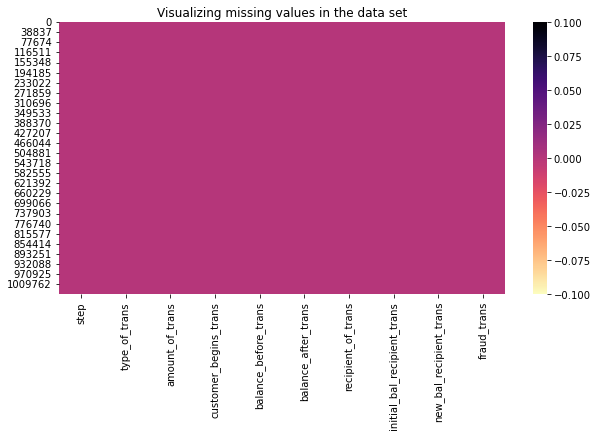

In [11]:
# Visualizing missing values
plt.figure(figsize = (10, 5))
plt.title('Visualizing missing values in the data set')
sns.heatmap(data.isnull(),  cbar = True, cmap = 'magma_r')

In [12]:
# Shape of the entire data set
data.shape

(1048575, 10)

In [13]:
# Checking the info of the columns and data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 10 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   step                         1048575 non-null  int64  
 1   type_of_trans                1048575 non-null  object 
 2   amount_of_trans              1048575 non-null  float64
 3   customer_begins_trans        1048575 non-null  object 
 4   balance_before_trans         1048575 non-null  float64
 5   balance_after_trans          1048575 non-null  float64
 6   recipient_of_trans           1048575 non-null  object 
 7   initial_bal_recipient_trans  1048575 non-null  float64
 8   new_bal_recipient_trans      1048575 non-null  float64
 9   fraud_trans                  1048575 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 80.0+ MB


In [14]:
data.describe().astype(int)

,step,amount_of_trans,balance_before_trans,balance_after_trans,initial_bal_recipient_trans,new_bal_recipient_trans,fraud_trans
count,1048575,1048575,1048575,1048575,1048575,1048575,1048575
mean,26,158666,874009,893808,978160,1114197,0
std,15,264940,2971750,3008271,2296780,2416593,0
min,1,0,0,0,0,0,0
25%,15,12149,0,0,0,0,0
50%,20,76343,16002,0,126377,218260,0
75%,39,213761,136642,174599,915923,1149807,0
max,95,10000000,38900000,38900000,42100000,42200000,1


<AxesSubplot:>

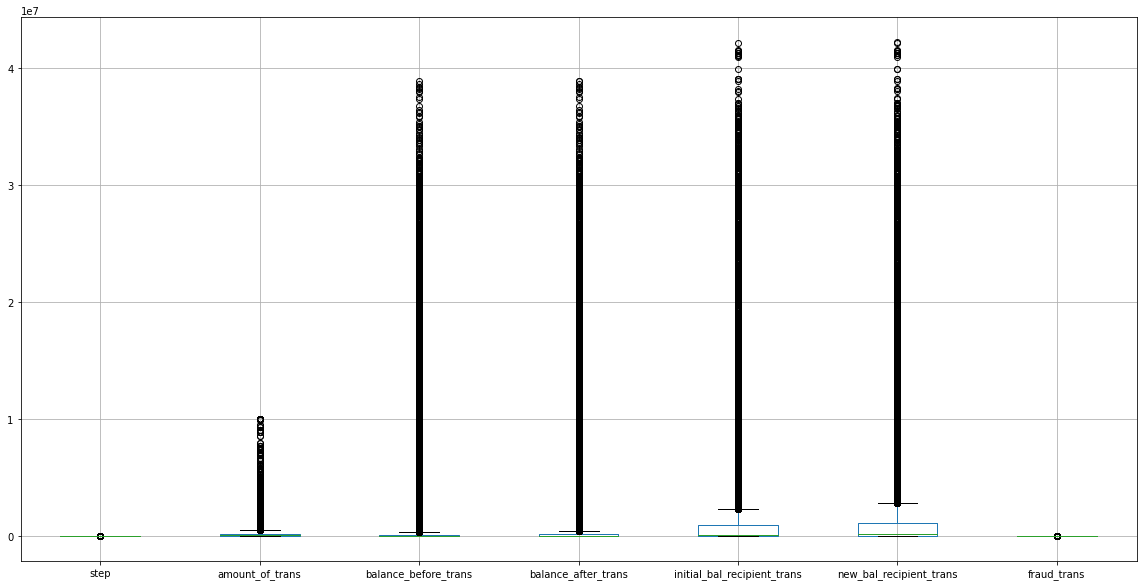

In [15]:
# Outlier detection
# When your mean is not equal to the median
data.boxplot(figsize = (20, 10))

### Relationship, insights and Visualizations
- Univariate Analysis
- Bivariate Analysis
- Multivariate Analysis

In [16]:
data.head()

,step,type_of_trans,amount_of_trans,customer_begins_trans,balance_before_trans,balance_after_trans,recipient_of_trans,initial_bal_recipient_trans,new_bal_recipient_trans,fraud_trans
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


In [17]:
data.columns

Index(['step', 'type_of_trans', 'amount_of_trans', 'customer_begins_trans',
       'balance_before_trans', 'balance_after_trans', 'recipient_of_trans',
       'initial_bal_recipient_trans', 'new_bal_recipient_trans',
       'fraud_trans'],
      dtype='object')

In [18]:
data.shape

(1048575, 10)

In [19]:
# Total transaction amount
bar = data.amount_of_trans.sum()
bar


166374223863.37

In [122]:
# Sum of transaction amount by payment type
bar1 = data.groupby('type_of_trans').amount_of_trans.sum().astype('int')
bar1

type_of_trans
CASH_IN    -2147483648
CASH_OUT   -2147483648
DEBIT         42195994
PAYMENT    -2147483648
TRANSFER   -2147483648
Name: amount_of_trans, dtype: int32

Text(0, 0.5, 'data.astype(int)')

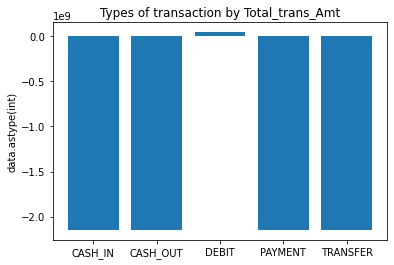

In [121]:
#plot the bar chart
plt.bar(x = bar1.index, height = bar1)

plt.title('Types of transaction by Total_trans_Amt')
plt.ylabel('data.astype(int)')

### Observation
- cash_in, cash_out, payment and transfer type has the same amount of transaction while Debit payment type experience
a positive movement from 0 upward along the positive y-axis.

In [22]:
# Total number of fraud transactions
bar2 = data.fraud_trans.value_counts()
bar2

0    1047433
1       1142
Name: fraud_trans, dtype: int64

In [23]:
# Create a function that properly labels fraud_trans
def fraud_transaction(x):
    if x == 1:
        return 'Fraud'
    else:
        return 'Not Fraud'
    

# Create a new column
data['fraud_trans_status'] = data['fraud_trans'].apply(fraud_transaction)


In [24]:
data.head()

,step,type_of_trans,amount_of_trans,customer_begins_trans,balance_before_trans,balance_after_trans,recipient_of_trans,initial_bal_recipient_trans,new_bal_recipient_trans,fraud_trans,fraud_trans_status
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,Not Fraud
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,Not Fraud
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,Fraud
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,Fraud
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,Not Fraud


In [25]:
data.tail()

,step,type_of_trans,amount_of_trans,customer_begins_trans,balance_before_trans,balance_after_trans,recipient_of_trans,initial_bal_recipient_trans,new_bal_recipient_trans,fraud_trans,fraud_trans_status
1048570,95,CASH_OUT,132557.35,C1179511630,479803.00,347245.65,C435674507,484329.37,616886.72,0,Not Fraud
1048571,95,PAYMENT,9917.36,C1956161225,90545.00,80627.64,M668364942,0.00,0.00,0,Not Fraud
1048572,95,PAYMENT,14140.05,C2037964975,20545.00,6404.95,M1355182933,0.00,0.00,0,Not Fraud
1048573,95,PAYMENT,10020.05,C1633237354,90605.00,80584.95,M1964992463,0.00,0.00,0,Not Fraud
1048574,95,PAYMENT,11450.03,C1264356443,80584.95,69134.92,M677577406,0.00,0.00,0,Not Fraud


(0.0, 55000.0)

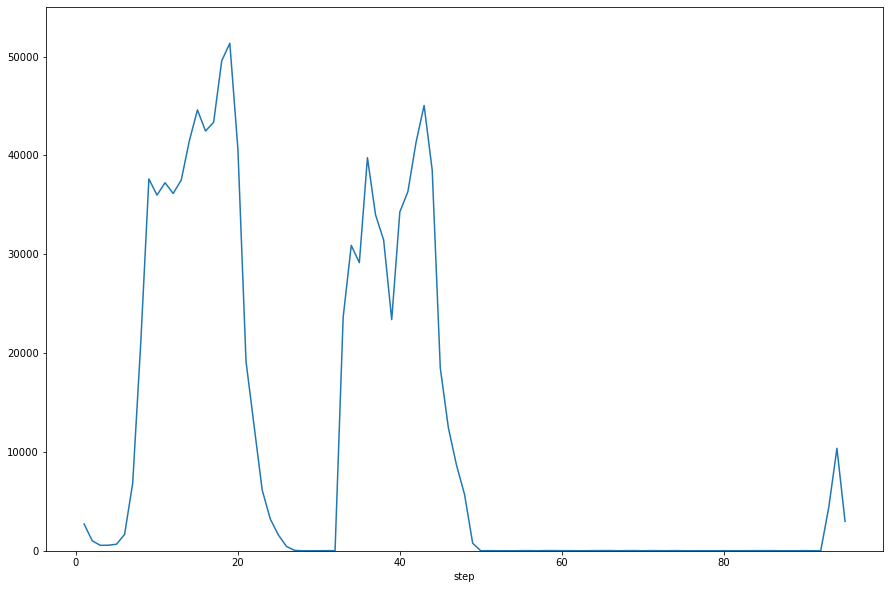

In [88]:
# Amount of trans by steps
plt.figure(figsize=(15,10))
data.groupby('step').amount_of_trans.count().plot()

plt.ylim(0,55000)

### Observation
- There was a sharp upward trend from 5hrs with a stready growth to hit a climax of the maximum transaction amount done before there was a sharp decrease the transaction amount...

CPU times: total: 7.14 s
Wall time: 7.61 s


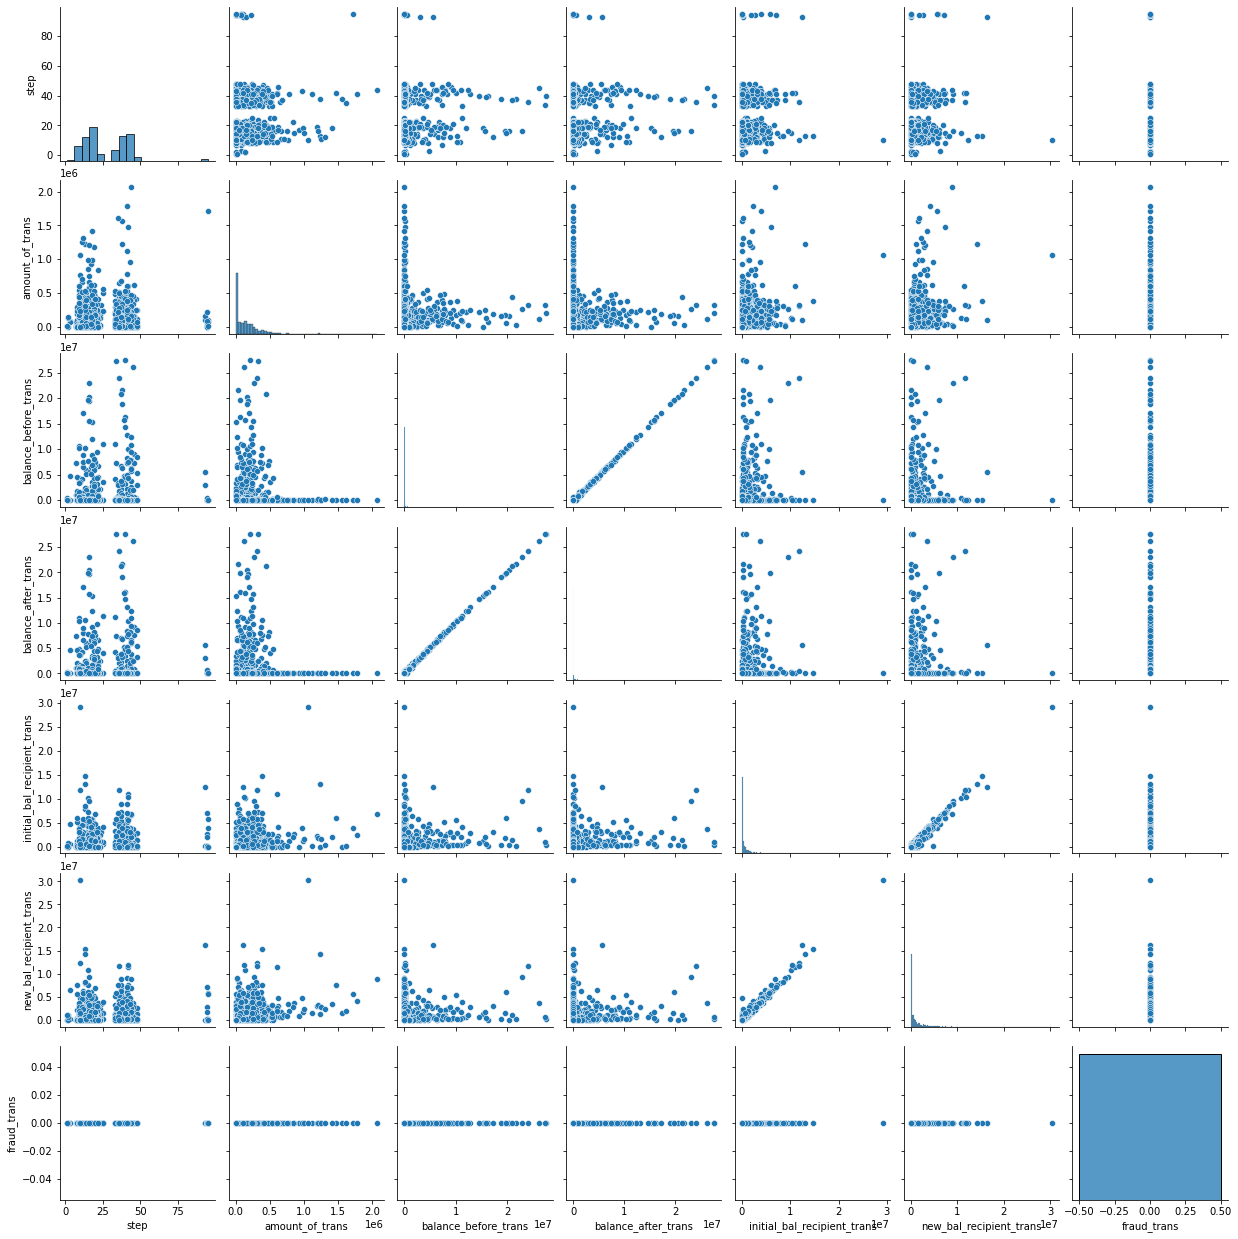

In [27]:
%%time
#view relationships between columns
#i'm doing pairplot on just a subset of the data
sns.pairplot(data.sample(1000))


(0.0, 100.0)

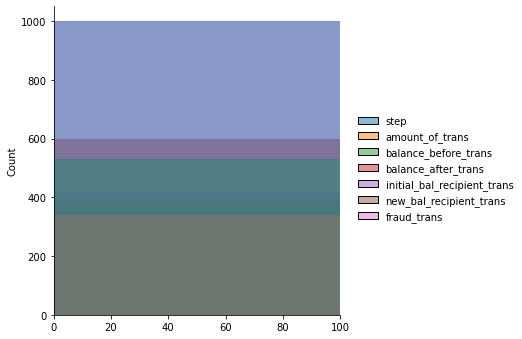

In [28]:
#distplot
sns.displot(data = data.sample(1000))
plt.xlim(0,100) #limit x axis to the section of interest


<AxesSubplot:xlabel='fraud_trans_status', ylabel='balance_after_trans'>

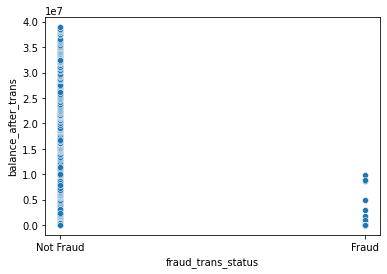

In [29]:
# Numerical vs Numerical

sns.scatterplot(x = data['fraud_trans_status'], y = data['balance_after_trans'].astype(int))

### Observation
- The probaibility that there will be fraud on the balance after transaction is low. Which shows that the transaction done is 
not fraud.

Text(0, 0.5, 'Count of fraud_trans')

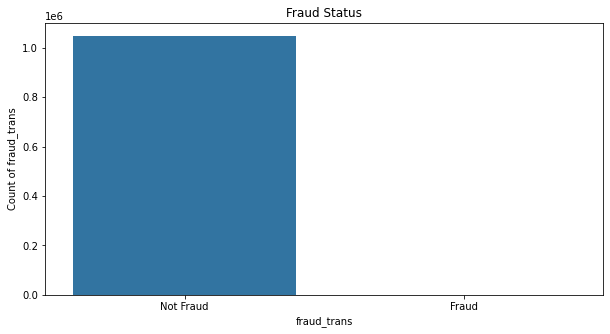

In [30]:
# Create a visualization
plt.figure(figsize = (10, 5))
plt.title('Fraud Status')
sns.countplot(x = 'fraud_trans_status', data = data)
plt.xlabel('fraud_trans')
plt.ylabel('Count of fraud_trans')

In [31]:
data.fraud_trans_status.value_counts()

Not Fraud    1047433
Fraud           1142
Name: fraud_trans_status, dtype: int64

Text(0, 0.5, 'Count of Amount of Trans')

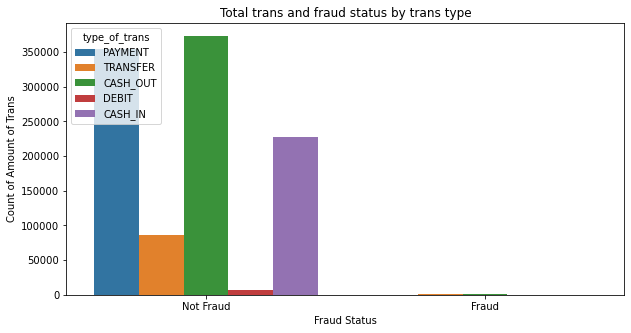

In [32]:
# Total trans and fraud status by trans type
# Create a visualization 
plt.figure(figsize = (10, 5))
plt.title('Total trans and fraud status by trans type')
sns.countplot(x = 'fraud_trans_status', data = data, hue = 'type_of_trans')
plt.xlabel('Fraud Status')
plt.ylabel('Count of Amount of Trans')

<AxesSubplot:xlabel='type_of_trans', ylabel='balance_before_trans'>

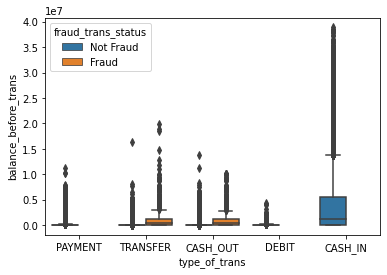

In [33]:
sns.boxplot(x = 'type_of_trans', y = 'balance_before_trans', data = data, hue = 'fraud_trans_status')

In [34]:
# Total balance_after_trans by customers begins trans
top_ten = (data.groupby('customer_begins_trans').balance_after_trans.sum().sort_values(ascending=False)[:10])
top_ten    

customer_begins_trans
C1450387949    38900000.0
C1841909664    38900000.0
C1576842193    38600000.0
C1040382471    38400000.0
C1273896430    38400000.0
C1319675286    38300000.0
C1548217173    38200000.0
C1114046451    38000000.0
C697666271     37900000.0
C1677602915    37500000.0
Name: balance_after_trans, dtype: float64

In [124]:
# Total balance_after_trans by customers begins trans
bottom_ten = (data.groupby('customer_begins_trans').balance_after_trans.sum().sort_values(ascending=True)[:10])
bottom_ten

customer_begins_trans
C1000001725    0.0
C2104817066    0.0
C2104819246    0.0
C2104823914    0.0
C2104827054    0.0
C2104832608    0.0
C2104834581    0.0
C210483589     0.0
C2104835939    0.0
C2104815114    0.0
Name: balance_after_trans, dtype: float64

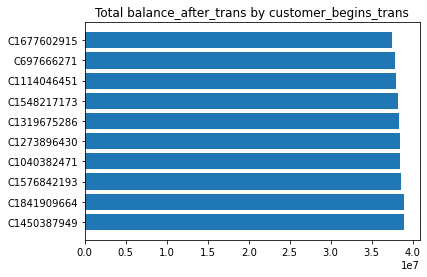

In [35]:
#use horizontal bar chart to visualize top 10
#use the series index as vertical axis and series values as horizontal axis of the barh() plot

plt.barh(y = top_ten.index, width = top_ten)
plt.title('Total balance_after_trans by customer_begins_trans')
plt.show()

In [94]:
# Count of trans by type_of_trans
trans_count = data.groupby('type_of_trans').amount_of_trans.count()
trans_count

type_of_trans
CASH_IN     227130
CASH_OUT    373641
DEBIT         7178
PAYMENT     353873
TRANSFER     86753
Name: amount_of_trans, dtype: int64

Text(0, 0.5, 'data.astype(int)')

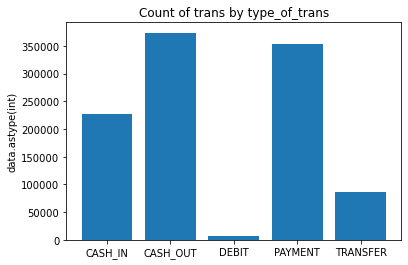

In [119]:
#plot the bar chart
plt.bar(x = trans_count.index, height = trans_count)
plt.title('Count of trans by type_of_trans')
plt.ylabel('data.astype(int)')

In [36]:
# Top 5 Total balance_after_trans by transaction type
top_5 = (data.groupby('type_of_trans').balance_after_trans.sum().sort_values(ascending=False)[:5])
top_5  

type_of_trans
CASH_IN     8.928467e+11
PAYMENT     3.273079e+10
CASH_OUT    9.848999e+09
TRANSFER    1.232635e+09
DEBIT       5.665558e+08
Name: balance_after_trans, dtype: float64

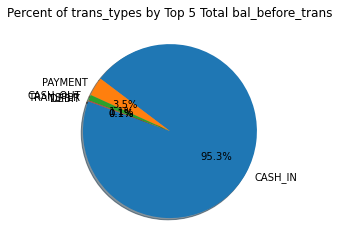

In [37]:
colors = ['#1f77b4', '#ff7f0e','#2ca02c', '#d62728', '#8c564b']
explode = (0.1, 0, 0, 0, 0)
plt.pie(top_5, labels = top_5.index  , colors = colors, 
        autopct = '%1.1f%%', shadow = True, startangle = 160)
 
plt.title('Percent of trans_types by Top 5 Total bal_before_trans')

plt.show()

<AxesSubplot:>

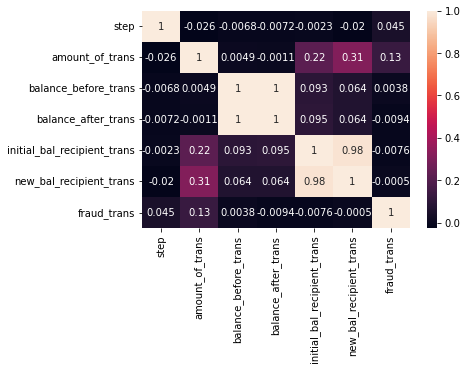

In [38]:
# Correlation between features
corel = data.corr()
sns.heatmap(corel, annot = True)

In [39]:
#Average amount_of_trans by trans_types
data.groupby('type_of_trans').amount_of_trans.mean().astype(int).reset_index(name = 'Avg_amount_of_trans')

,type_of_trans,Avg_amount_of_trans
0,CASH_IN,169923
1,CASH_OUT,184039
2,DEBIT,5878
3,PAYMENT,11122
4,TRANSFER,634403


In [40]:
bar3 = data.groupby('type_of_trans').amount_of_trans.mean().astype(int)
bar3

type_of_trans
CASH_IN     169923
CASH_OUT    184039
DEBIT         5878
PAYMENT      11122
TRANSFER    634403
Name: amount_of_trans, dtype: int32

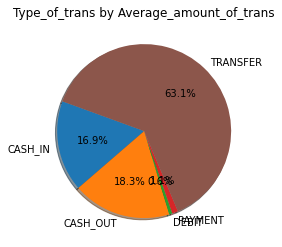

In [41]:
colors = ['#1f77b4', '#ff7f0e','#2ca02c', '#d62728', '#8c564b']
explode = (0.1, 0, 0, 0, 0)
plt.pie(bar3, labels = bar3.index  , colors = colors, 
        autopct = '%1.1f%%', shadow = True, startangle = 160)
 
plt.title('Type_of_trans by Average_amount_of_trans')

plt.show()

## Feature Engineering
- Encoding categorical variables
- Create new features from existing features where necessary, depending on insights from your EDA

In [42]:
data.duplicated().sum()

0

In [43]:
data.isnull().sum()

step                           0
type_of_trans                  0
amount_of_trans                0
customer_begins_trans          0
balance_before_trans           0
balance_after_trans            0
recipient_of_trans             0
initial_bal_recipient_trans    0
new_bal_recipient_trans        0
fraud_trans                    0
fraud_trans_status             0
dtype: int64

## One-Hot Encoding
with one-hot encoding, we convert categorical data into numerical.

Each value of a column is pivoted into a column of its own. The values in this new column will be either 1 or 0 to show whether the value exist or not.

In [44]:
data.head()

,step,type_of_trans,amount_of_trans,customer_begins_trans,balance_before_trans,balance_after_trans,recipient_of_trans,initial_bal_recipient_trans,new_bal_recipient_trans,fraud_trans,fraud_trans_status
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,Not Fraud
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,Not Fraud
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,Fraud
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,Fraud
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,Not Fraud


In [55]:
#data.drop(['fraud_trans_status', 'type_of_trans', 'customer_begins_trans', 'recipient_of_trans'], axis = 1)
df = data.drop(data.columns[[1,3,6,10]], axis = 1)
df

,step,amount_of_trans,balance_before_trans,balance_after_trans,initial_bal_recipient_trans,new_bal_recipient_trans,fraud_trans
0,1,9839.64,170136.00,160296.36,0.00,0.00,0
1,1,1864.28,21249.00,19384.72,0.00,0.00,0
2,1,181.00,181.00,0.00,0.00,0.00,1
3,1,181.00,181.00,0.00,21182.00,0.00,1
4,1,11668.14,41554.00,29885.86,0.00,0.00,0
...,...,...,...,...,...,...,...
1048570,95,132557.35,479803.00,347245.65,484329.37,616886.72,0
1048571,95,9917.36,90545.00,80627.64,0.00,0.00,0
1048572,95,14140.05,20545.00,6404.95,0.00,0.00,0
1048573,95,10020.05,90605.00,80584.95,0.00,0.00,0


In [56]:
df.shape

(1048575, 7)

In [57]:
df.columns

Index(['step', 'amount_of_trans', 'balance_before_trans',
       'balance_after_trans', 'initial_bal_recipient_trans',
       'new_bal_recipient_trans', 'fraud_trans'],
      dtype='object')

### Choose your target
TODO:

set y as the fraud_trans column. Your code will be similar to dataframe.fraud_trans_column_name
set X as data except the fraud_trans column. You can use drop() to remove fraud_trans when doing this assignment. Your code will be similar to data.drop(fraud_trans, axis=1)

In [58]:
#your code here:
y = df.fraud_trans 
X = df.drop('fraud_trans', axis=1)

## Preparing the models

In [59]:
#import the libraries we will need
# Machine Learning
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict

# ML Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

# ML Metrics
from sklearn.metrics import accuracy_score, classification_report

# Visualizations
import seaborn as sns

In [50]:
#1. select categorical variables
#replace pass with your code

#categorical = ['type_of_trans', 'customer_begins_trans', 'recipient_of_trans', 'fraud_trans_status']

In [51]:
#data.head()

,step,type_of_trans,amount_of_trans,customer_begins_trans,balance_before_trans,balance_after_trans,recipient_of_trans,initial_bal_recipient_trans,new_bal_recipient_trans,fraud_trans,fraud_trans_status
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,Not Fraud
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,Not Fraud
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,Fraud
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,Fraud
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,Not Fraud


In [60]:
#split into training and validation sets using a 20% split ratio
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.2)

# TODO: initialize logistic regression
LR = LogisticRegression()

#TODO: initialize k neighbors
KN = KNeighborsClassifier()

#TODO: initialize decision tree
DC = DecisionTreeClassifier()

#TODO: initialize random forest
RF = RandomForestClassifier()

#create list of your model names
models = [LR,KN,DC,RF]

In [62]:
def plot_confusion_matrix(y_valid,prediction):
    cm_ = confusion_matrix(y_valid,prediction)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm_,
    cmap='coolwarm',
    linecolor='white',
    linewidths=1,
    annot=True,
    fmt='d')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

In [63]:
from sklearn.metrics import confusion_matrix

In [64]:
#create function to train a model and evaluate accuracy
def trainer(model, X_train, y_train, X_valid,y_valid):
    #fit your model
    model.fit(X_train, y_train)
    #predict on the fitted model
    prediction = model.predict(X_valid)
    #print evaluation metric
    print('\nFor {}, Accuracy score is {} \n'.format(model.__class__.__name__,accuracy_score(prediction,y_valid)))
    print(classification_report(prediction,y_valid)) #use this later
    plot_confusion_matrix(y_valid,prediction)


For LogisticRegression, Accuracy score is 0.9990034093889326 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    209579
           1       0.34      0.58      0.43       136

    accuracy                           1.00    209715
   macro avg       0.67      0.79      0.72    209715
weighted avg       1.00      1.00      1.00    209715



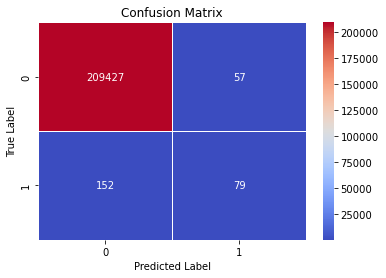


For KNeighborsClassifier, Accuracy score is 0.9993848794792933 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    209573
           1       0.53      0.86      0.65       142

    accuracy                           1.00    209715
   macro avg       0.76      0.93      0.83    209715
weighted avg       1.00      1.00      1.00    209715



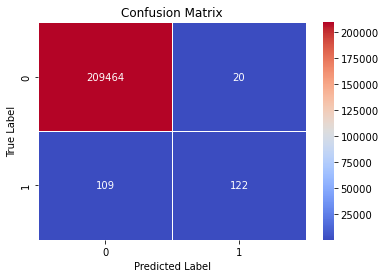


For DecisionTreeClassifier, Accuracy score is 0.9995851512767328 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    209499
           1       0.78      0.83      0.81       216

    accuracy                           1.00    209715
   macro avg       0.89      0.92      0.90    209715
weighted avg       1.00      1.00      1.00    209715



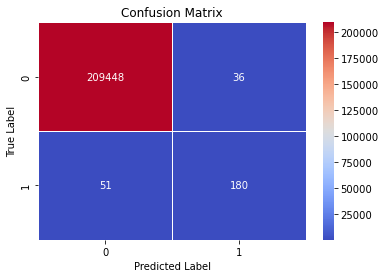


For RandomForestClassifier, Accuracy score is 0.9996566769186753 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    209554
           1       0.69      0.99      0.82       161

    accuracy                           1.00    209715
   macro avg       0.85      1.00      0.91    209715
weighted avg       1.00      1.00      1.00    209715



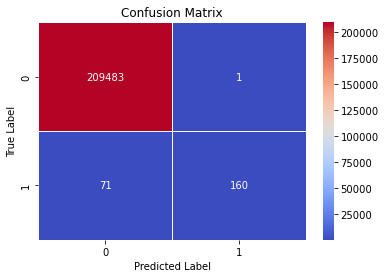

In [65]:
#loop through each model, training in the process
for model in models:
    trainer(model, X_train,y_train, X_valid,y_valid)    

### Observation
Random forest classifier has the highest degree accuracy of 99.97% with a recall of 99% for fraud with a precision of 69% using the confusion matrix. it means that approximately 70% of the transaction amount has a likelihood of being fraud_transaction for the predicted label.

## Features Engineering
- Inspect Feature Importances
- Feature Selection

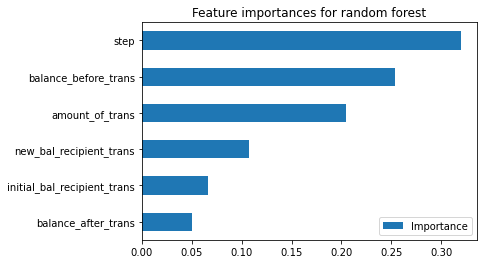

In [68]:
#get feature importances
RF_importances = pd.DataFrame(data = RF.feature_importances_,index = X_valid.columns, columns=['Importance'])

#plot top 10 feature importances, sorted
RF_importances[:9].sort_values(by='Importance').plot.barh()

plt.title('Feature importances for random forest')
plt.show()

In [69]:
# Get these top 5 importances
RF_importances[:4].sort_values(by='Importance').index.values

array(['balance_after_trans', 'amount_of_trans', 'balance_before_trans',
       'step'], dtype=object)

## A Bit of Feature Selection

In [71]:
#create a new X train with only 4 features
X_train2 = X_train[['balance_after_trans', 'amount_of_trans', 'balance_before_trans',
       'step']]
X_train2.head(2)

,balance_after_trans,amount_of_trans,balance_before_trans,step
677857,0.0,77082.61,0.0,36
1024464,0.0,1605.70,0.0,48


In [72]:
# Create a new X_valid with only 4 features so we can predict on them
X_valid2 = X_valid[['balance_after_trans', 'amount_of_trans', 'balance_before_trans',
       'step']]

In [90]:
# Train and predict
RF.fit(X_train2, y_train)
pred2 = RF.predict(X_valid2)

print(accuracy_score(pred2,y_valid)) 

0.9998950957251508


## Questions
- Analyse the results of your trained model
 
- What metrics are most important for the problem? For instance, should the business be more concerned with better results on false negatives or true positives?

## Evaluating with Cross Validation
In cross validation, the model splits the training data into multiple blocks. Using 1 block as test set for each training iteration, it trains the other blocks and validates against the test data.

This gives you an idea of how the model will perform when it sees new data in the real world that it hasn't seen before.

In [74]:
# Evaluate your models using k-fold cross-validation
from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.linear_model import LogisticRegression

# prepare the cross-validation procedure
cv = KFold(n_splits=5, random_state=1, shuffle=True)

In [75]:
#create function to train a model with cross validations and evaluate accuracy
def trainer_with_cv(model, X, y):
    '''Cross validation function. Expects a model,'''
    # evaluate model
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    # report performance
    print('Accuracy: %.3f' % (mean(scores)))

In [76]:
#train and predict, looping through the list of models
for model in models:
    trainer_with_cv(model, X_train2, y_train)

Accuracy: 0.999
Accuracy: 0.999
Accuracy: 1.000
Accuracy: 1.000


In [79]:
#create function to train a model with cross validations and evaluate accuracy
def trainer_with_cv(model, X, y):
    '''Cross validation function. Expects a model,'''
    # evaluate model
    scores = cross_val_score(model, X, y, scoring='precision', cv=cv, n_jobs=-1)
    # report performance
    print('Precision: %.3f' % (mean(scores)))

In [82]:
#train and predict, looping through the list of models
for model in models:
    trainer_with_cv(model, X_train2, y_train)

Precision: 0.531
Precision: 0.687
Precision: 0.842
Precision: 0.977


In [83]:
#create function to train a model with cross validations and evaluate accuracy
def trainer_with_cv(model, X, y):
    '''Cross validation function. Expects a model,'''
    # evaluate model
    scores = cross_val_score(model, X, y, scoring='recall', cv=cv, n_jobs=-1)
    # report performance
    print('Recall: %.3f' % (mean(scores)))

In [84]:
#train and predict, looping through the list of models
for model in models:
    trainer_with_cv(model, X_train2, y_train)

Recall: 0.302
Recall: 0.660
Recall: 0.867
Recall: 0.864


### Observation of the cross validation 
- I observed that from the cross validation, Random Forest Classifier shown the highest performance in terms of precision, accuracy and recall. This is to evaluate the authenticity of the model used in training the data set and how well it can fit into a new data set. Here, the machine learning model can be generalize into a new data set for better performance and accurate prediction of the target; fraud.